In [25]:
%matplotlib inline
%pylab inline
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
import os
import matplotlib.pyplot as plt
import xarray.plot as xplot

pylab.rcParams['figure.figsize'] = (20, 12)

Populating the interactive namespace from numpy and matplotlib


In [19]:
chlor_a_dir = "chlor_a"

In [20]:
sst_dir = "sst"

In [144]:
#%timeit
chlor_a = xr.open_mfdataset(os.path.join(chlor_a_dir, "*.nc"))
sst = xr.open_dataset(os.path.join(sst_dir, "20100101120000-ESACCI-L4_GHRSST-SSTdepth-OSTIA-GLOB_LT-v02.0-fv01.1.nc") ,mask_and_scale=False, decode_cf=False)
#sst = xr.open_mfdataset(os.path.join(sst_dir, "*.nc") ,mask_and_scale=False, decode_cf=False)
soil = xr.open_dataset("SoilMoisture.ESACCI-L3S.2004.v2_1.nc")

In [8]:
chlor_a_var = chlor_a['chlor_a']
chlor_a_subset = chlor_a_var.sel(lat=slice(60,30),lon=slice(0,30))

In [9]:
chlor_a_subset

<xarray.DataArray 'chlor_a' (time: 12, lat: 720, lon: 720)>
dask.array<getitem..., shape=(12, 720, 720), dtype=float64, chunksize=(1, 720, 720)>
Coordinates:
  * lon      (lon) float32 0.0208333 0.0625 0.104167 0.145833 0.1875 ...
  * lat      (lat) float32 59.9792 59.9375 59.8958 59.8542 59.8125 59.7708 ...
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 2010-03-01 ...
Attributes:
    long_name: Chlorophyll-a concentration in seawater (not log-transformed), generated by SeaDAS using OC4v6 for SeaWiFS
    units: milligram m-3
    ancillary_variables: chlor_a_log10_rmsd,chlor_a_log10_bias
    grid_mapping: crs
    parameter_vocab_uri: http://vocab.ndg.nerc.ac.uk/term/P011/current/CHLTVOLU
    standard_name: mass_concentration_of_chlorophyll_a_in_sea_water
    units_nonstandard: mg m^-3

In [10]:
def mycorr(x,y,dim=None):
    return (((x-x.mean(dim=dim))*(y-y.mean(dim=dim))).sum(dim=dim)/x[dim].size)/(x.std(dim=dim)*y.std(dim=dim))

In [13]:
cov_chlra = mycorr(chlor_a_subset, chlor_a_subset, dim='time')

C:\Miniconda3\envs\conda-xarray\lib\site-packages\dask\array\numpy_compat.py:44: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Miniconda3\envs\conda-xarray\lib\site-packages\dask\array\reductions.py:265: RuntimeWarning: invalid value encountered in true_divide
  u = total/n
C:\Miniconda3\envs\conda-xarray\lib\site-packages\dask\async.py:246: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


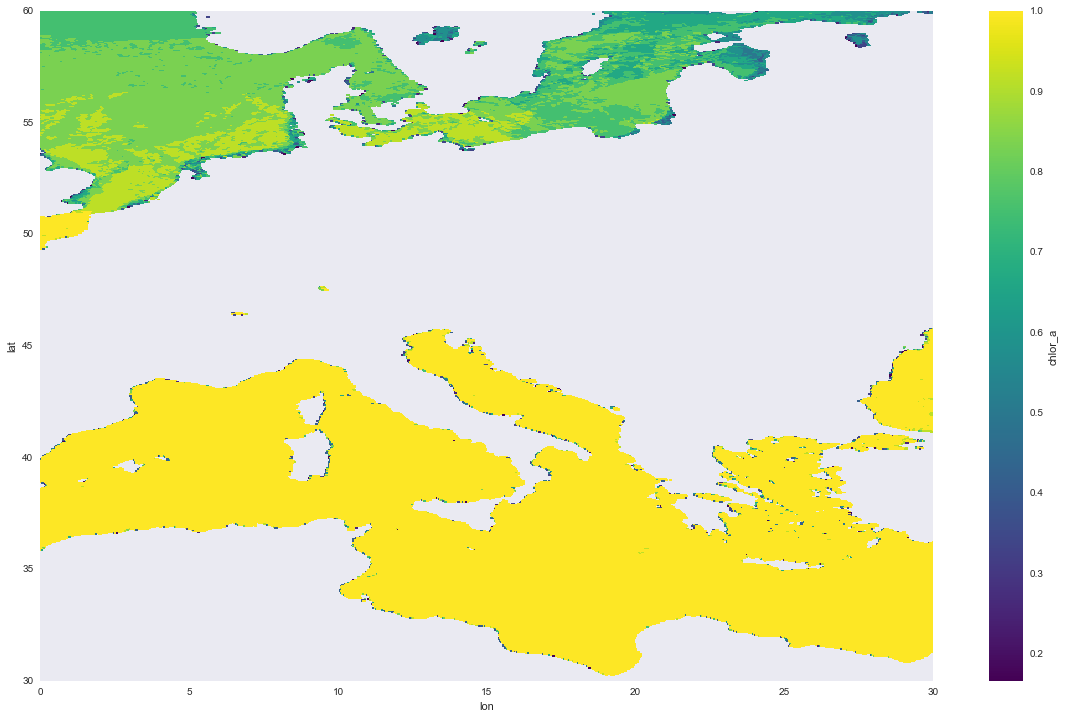

In [14]:
cov_chlra.plot()

In [16]:
cov_chlra.min()

<xarray.DataArray 'chlor_a' ()>
dask.array<p_reduc..., shape=(), dtype=float64, chunksize=()>

In [17]:
cov_chlra.max()

<xarray.DataArray 'chlor_a' ()>
dask.array<p_reduc..., shape=(), dtype=float64, chunksize=()>

In [145]:
sst_var = sst['analysed_sst']

In [159]:
sst_var.isel(time=0,lat=0,lon=-180)

<xarray.DataArray 'analysed_sst' ()>
array(128, dtype=int16)
Coordinates:
    time     int32 -1061647306
    lat      float32 -89.975
    lon      float32 171.025
Attributes:
    _FillValue: -32768
    units: kelvin
    scale_factor: 0.01
    add_offset: 273.15
    long_name: analysed sea surface temperature
    valid_min: -300
    valid_max: 4500
    standard_name: sea_water_temperature
    depth: 20 cm
    source: ATSR<1,2>-ESACCI-L3U-v1.0, AATSR-ESACCI-L3U-v1.0, AVHRR<12,14,15,16,17,18>_G-ESACCI-L2P-v1.0, AVHRRMTA-ESACCI-L2P-v1.0
    comment: SST analysis produced for ESA SST CCI project using the OSTIA system in reanalysis mode.

In [158]:
sst_var[0].values

array([[  128,   128,   128, ...,   128,   128,   128],
       [  128,   128,   128, ...,   128,   128,   128],
       [  128,   128,   128, ...,   128,   128,   128],
       ..., 
       [19967, 19967, 19967, ..., 19967, 19967, 19967],
       [19967, 19967, 19967, ..., 19967, 19967, 19967],
       [19967, 19967, 19967, ..., 19967, 19967, 19967]], dtype=int16)

In [160]:
sst_real = (((sst_var.isel(time=0) + 32768) / 65536) * 4800 ) - 300

In [161]:
sst_real.max()

<xarray.DataArray 'analysed_sst' ()>
array(4499.9267578125)
Coordinates:
    time     int32 -1061647306

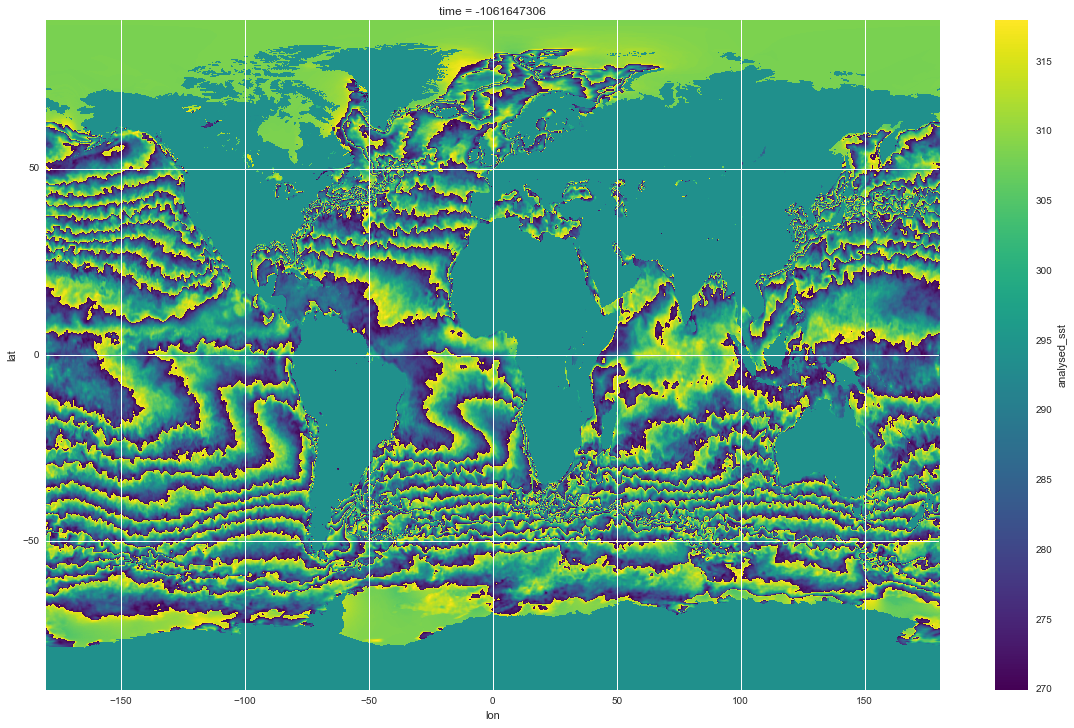

In [163]:
sst_subset = sst_var.isel(time=0, lat=slice(1800,2100), lon=slice(0,300))
sst_subset_real = (sst_subset * 0.01) + 273
xplot.imshow((sst_real * 0.01) + 273)

In [107]:
sst_subset_real.isel(lat=0,lon=0)

<xarray.DataArray 'analysed_sst' ()>
array(65.75)
Coordinates:
    time     datetime64[ns] 1947-05-12T09:58:14
    lat      float32 0.025
    lon      float32 -179.975

In [90]:
sst_var.isel(time=0,lon=7199)

<xarray.DataArray 'analysed_sst' (lat: 3600)>
array([ 274.42999387,  274.42999387,  274.42999387, ...,  472.81998943,
        472.81998943,  472.81998943])
Coordinates:
    time     datetime64[ns] 1947-05-12T09:58:14
  * lat      (lat) float32 -89.975 -89.925 -89.875 -89.825 -89.775 -89.725 ...
    lon      float32 179.975
Attributes:
    units: kelvin
    long_name: analysed sea surface temperature
    valid_min: -300
    valid_max: 4500
    standard_name: sea_water_temperature
    depth: 20 cm
    source: ATSR<1,2>-ESACCI-L3U-v1.0, AATSR-ESACCI-L3U-v1.0, AVHRR<12,14,15,16,17,18>_G-ESACCI-L2P-v1.0, AVHRRMTA-ESACCI-L2P-v1.0
    comment: SST analysis produced for ESA SST CCI project using the OSTIA system in reanalysis mode.

In [87]:
sst_var

dtype('float64')

In [95]:
soil.time

<xarray.DataArray 'time' (time: 366)>
array(['2004-01-01T01:00:00.000000000+0100',
       '2004-01-02T01:00:00.000000000+0100',
       '2004-01-03T01:00:00.000000000+0100',
       '2004-01-04T01:00:00.000000000+0100',
       '2004-01-05T01:00:00.000000000+0100',
       '2004-01-06T01:00:00.000000000+0100',
       '2004-01-07T01:00:00.000000000+0100',
       '2004-01-08T01:00:00.000000000+0100',
       '2004-01-09T01:00:00.000000000+0100',
       '2004-01-10T01:00:00.000000000+0100',
       '2004-01-11T01:00:00.000000000+0100',
       '2004-01-12T01:00:00.000000000+0100',
       '2004-01-13T01:00:00.000000000+0100',
       '2004-01-14T01:00:00.000000000+0100',
       '2004-01-15T01:00:00.000000000+0100',
       '2004-01-16T01:00:00.000000000+0100',
       '2004-01-17T01:00:00.000000000+0100',
       '2004-01-18T01:00:00.000000000+0100',
       '2004-01-19T01:00:00.000000000+0100',
       '2004-01-20T01:00:00.000000000+0100',
       '2004-01-21T01:00:00.000000000+0100',
       '2004-01-2